In [7]:
%matplotlib inline
from cascade import *
import cascade_secs as csx
from rho_earth import *
from rho_sun import *
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

In [8]:
logemin = 2
logemax = 5
NumEnodes= 200
energy_nodes = np.logspace(logemin,logemax,NumEnodes)
gamma = 3
flavor = 3

In [9]:
w,v,ci,energy_nodes = get_eigs(flavor,gamma)
Na = 6.022e23

In [10]:
get_t_sun(0.8*Rsun)*Na

4.158916394067796e+40

In [11]:
def get_attn_sun(flavor,gamma,b):
    w,v,ci,energy_nodes = get_eigs(flavor,logemin=0,logemax=5,NumNodes=200)
    t = get_t_sun(b*Rsun)*Na # g/cm^2
    print w,t
    phisol = np.dot(v,(ci*np.exp(w*t)))*energy_nodes**(gamma-2.)
    return energy_nodes, phisol

In [12]:
energy_nodes,phi1 = get_attn_sun(1,gamma,b=0.9)
phi1

[ -7.08251140e-36  -7.64501268e-36  -8.24985011e-36  -8.90036839e-36
  -9.59980457e-36  -1.03511950e-35  -1.11582650e-35  -1.20245630e-35
  -1.29538316e-35  -1.39497501e-35  -1.50161091e-35  -1.61575860e-35
  -1.73790461e-35  -1.86843830e-35  -2.00789774e-35  -2.15679939e-35
  -2.31566916e-35  -2.48505495e-35  -2.66532651e-35  -2.85706430e-35
  -3.06092408e-35  -3.27752317e-35  -3.50743086e-35  -3.75122675e-35
  -4.00959575e-35  -4.28312832e-35  -4.57238372e-35  -4.87764240e-35
  -5.20012535e-35  -5.54031577e-35  -5.89906178e-35  -6.27710003e-35
  -6.67507031e-35  -7.09371909e-35  -7.53368583e-35  -7.99567934e-35
  -8.48035248e-35  -8.98845111e-35  -9.52080474e-35  -1.00782302e-34
  -1.06615586e-34  -1.12715900e-34  -1.19089665e-34  -1.25753009e-34
  -1.32710296e-34  -1.39971965e-34  -1.47552690e-34  -1.55458209e-34
  -1.63700219e-34  -1.72291715e-34  -1.81242703e-34  -1.90563248e-34
  -2.00264753e-34  -2.10362161e-34  -2.20870846e-34  -2.31803023e-34
  -2.43175956e-34  -2.55002311e-34

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

4.15851468794e+36


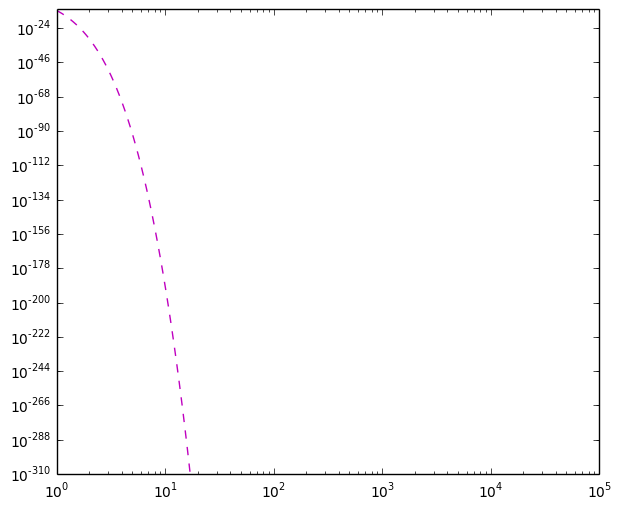

In [45]:
energy_nodes,phi1 = get_attn_sun(1,gamma,b=0.8)
plt.figure(figsize=(7,6))
plt.loglog(energy_nodes,phi1,linestyle='--',c='m')
#plt.ylim(1.0e-5,1.0e0)

In [5]:
def get_avg_attn(flavor,gamma):
    w,v,ci,energy_nodes = get_eigs(flavor,gamma)
    tlength = 230
    tvec = np.linspace(-1,1,tlength)
    phiv = energy_nodes*0.
    for ctheta in tvec:
        t = get_t(np.arccos(ctheta))*Na*1000./100.**2 # g/ cm^2
        phisol = np.dot(v,(ci*np.exp(w*t)))*energy_nodes**(gamma-2.)
        phiv = phiv + phisol
    phiv = phiv/tlength
    return energy_nodes, phiv

def get_avg_attn_secs(flavor,gamma):
    w,v,ci,energy_nodes,phi_0 = csx.get_eigs(flavor,gamma)
    tlength = 230
    tvec = np.linspace(-1,1,tlength)
    phiv = phi_0*0.
    for ctheta in tvec:
        t = get_t(np.arccos(ctheta))*Na*1000./100.**2 # g/ cm^2
        phisol = np.dot(v,(ci*np.exp(w*t)))/phi_0
        phiv = phiv + phisol
    phiv = phiv/tlength
    phiv = phiv[0:200] #only keep non-tau bit
    return energy_nodes, phiv

# Example plot Att(E) for single flavor, zenith

In [5]:
flavor = -3
zenith = 180.
sigma_fname="data/nutaubarxs.dat"
sigma_array = np.loadtxt(sigma_fname)
w,v,ci,energy_nodes = get_eigs(flavor,gamma)

t = get_t((zenith-180.)/180.*np.pi)*Na*1000/100**2 # g/ cm^2
phisol = np.dot(v,(ci*np.exp(w*t)))*energy_nodes**(gamma-2.)


//anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


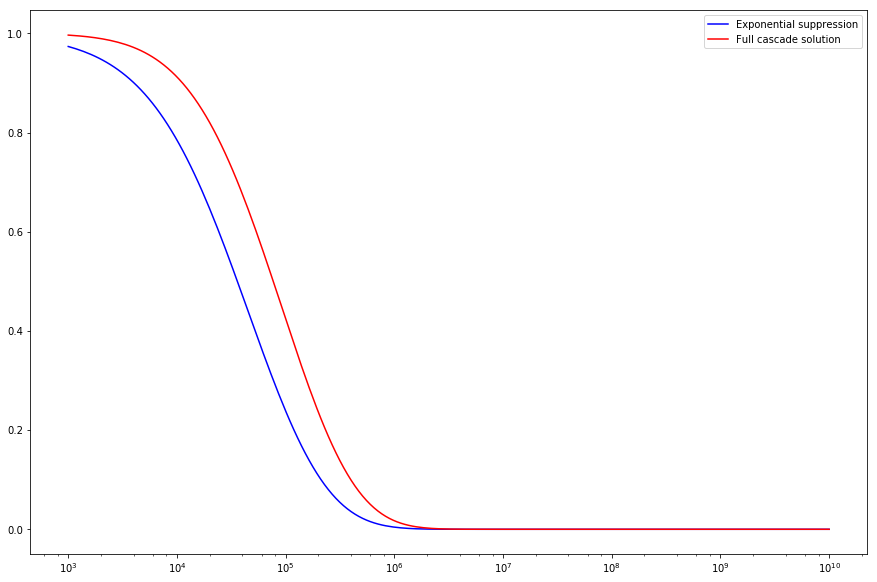

In [6]:
plt.figure(figsize=(15,10))
plt.semilogx(energy_nodes,np.exp(-sigma_array*t),c='b')
plt.semilogx(energy_nodes,phisol,c='r')
plt.legend( ['Exponential suppression', 'Full cascade solution'])

# plot average attenuation

In [7]:


energy_nodes,phim3= get_avg_attn(-3,gamma)
energy_nodes,phim2= get_avg_attn(-2,gamma)
energy_nodes,phim1 = get_avg_attn(-1,gamma)

energy_nodes,phi3= get_avg_attn(3,gamma)
energy_nodes,phi2= get_avg_attn(2,gamma)
energy_nodes,phi1 = get_avg_attn(1,gamma)


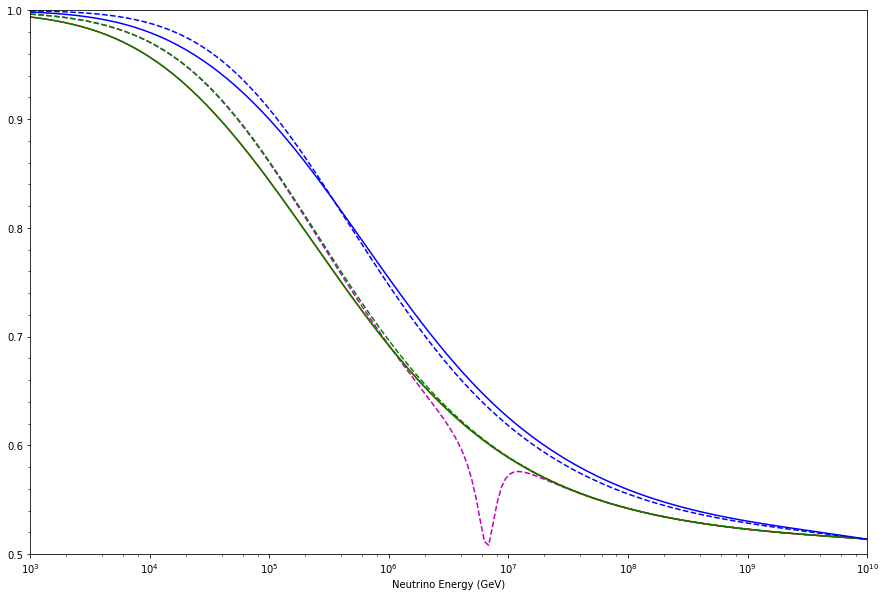

In [8]:
plt.figure(figsize=(15,10))
plt.semilogx(energy_nodes,phim1,linestyle='--',c='m')
plt.semilogx(energy_nodes,phim2,linestyle='--',c='g')
plt.semilogx(energy_nodes,phim3,linestyle='--',c='b')
plt.semilogx(energy_nodes,phi1,c='r')
plt.semilogx(energy_nodes,phi2,c='g')
plt.semilogx(energy_nodes,phi3,c='b')
plt.xlim((1e3,1e10));
plt.ylim(.5,1);
plt.xlabel("Neutrino Energy (GeV)")
matplotlib.rcParams.update({'font.size': 26})
plt.minorticks_on()


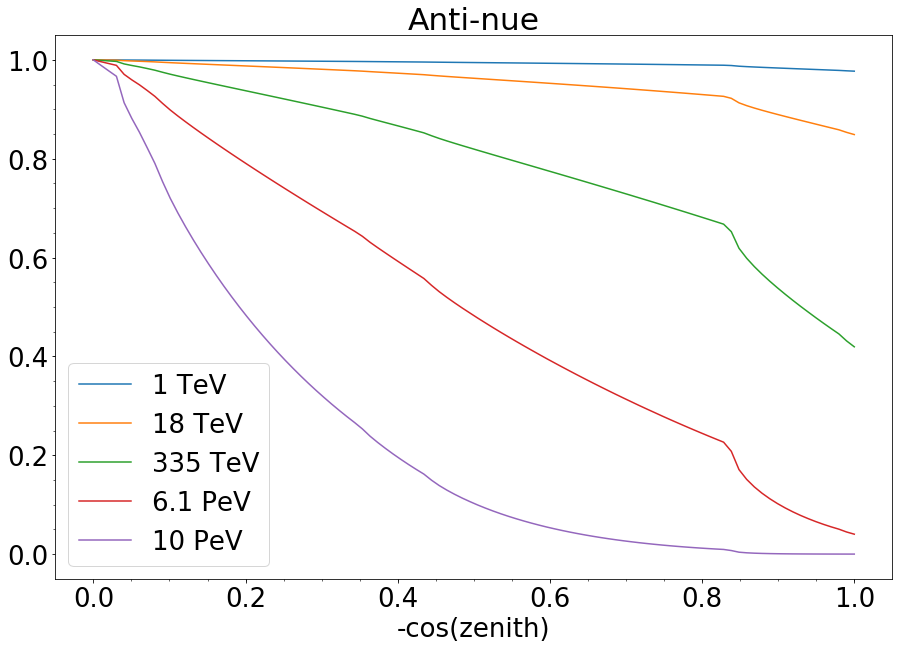

In [9]:
gamma = 2
flavor = -1
w,v,ci,energy_nodes = get_eigs(flavor,gamma)
tlength = 100
Eindex = 80 #which energy index do you want to see?

tvec = np.linspace(0,1,tlength)
phiv1 = tvec*0
phiv2 = tvec*0
phiv3 = tvec*0
phiv4 = tvec*0
phiv5 = tvec*0
for i in range(0,tlength):
    ctheta = tvec[i]
    t = get_t(np.arccos(ctheta))*Na*1000./100.**2 # g/ cm^2
    phisol = np.dot(v,(ci*np.exp(w*t)))*energy_nodes**(gamma-2.)
    phiv1[i] = phisol[0]
    phiv2[i] = phisol[25]
    phiv3[i] = phisol[50]
    phiv4[i] = phisol[75]
    phiv5[i] = phisol[99]
#     print t
plt.figure(figsize=(15,10))
plt.plot(tvec,phiv1)
plt.plot(tvec,phiv2)
plt.plot(tvec,phiv3)
plt.plot(tvec,phiv4)
plt.plot(tvec,phiv5)
plt.legend(['1 TeV','18 TeV','335 TeV','6.1 PeV','10 PeV'])
plt.xlabel("-cos(zenith)")
plt.title('Anti-nue')
matplotlib.rcParams.update({'font.size': 26})
plt.minorticks_on()

# Include secondaries

In [10]:
energy_nodes,phim2s= get_avg_attn_secs(-2,gamma)
energy_nodes,phim1s= get_avg_attn_secs(-1,gamma)
energy_nodes,phi1s = get_avg_attn_secs(1,gamma)
energy_nodes,phi2s = get_avg_attn_secs(2,gamma)

-2
-1
1
2


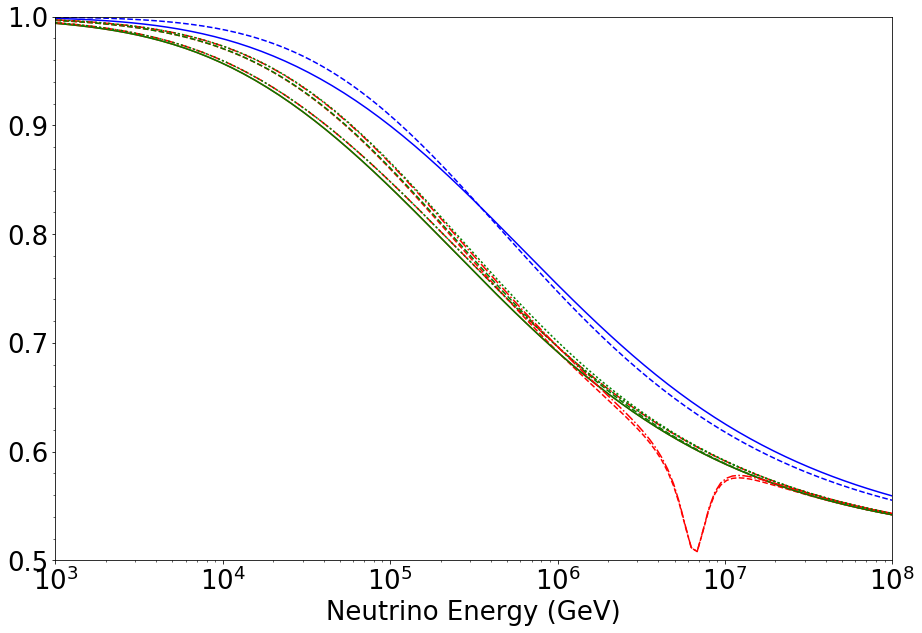

In [12]:
plt.figure(figsize=(15,10))
plt.semilogx(energy_nodes,phim1,linestyle='--',c='r')
plt.semilogx(energy_nodes,phim2,linestyle='--',c='g')
plt.semilogx(energy_nodes,phim3,linestyle='--',c='b')
plt.semilogx(energy_nodes,phi1,c='r')
plt.semilogx(energy_nodes,phi2,c='g')
plt.semilogx(energy_nodes,phi3,c='b')
plt.semilogx(energy_nodes,phi1s,c='r',linestyle='-.')
plt.semilogx(energy_nodes,phi2s,c='g',linestyle=':')
plt.semilogx(energy_nodes,phim1s,c='r',linestyle='-.')
plt.semilogx(energy_nodes,phim2s,c='g',linestyle=':')
plt.xlim((1e3,1e8));
plt.ylim(.5,1);
plt.xlabel("Neutrino Energy (GeV)")
matplotlib.rcParams.update({'font.size': 26})
plt.minorticks_on()